<a href="https://colab.research.google.com/github/PGaea/Butardo_DAF/blob/main/StudentsPerformance_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PGaea/Butardo_DAF/refs/heads/main/StudentsPerformance1.csv')

In [4]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [5]:
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [9]:
df = df.dropna()

In [16]:
#df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1}).fillna(0).astype(int)

In [23]:
df['test preparation course'] = df['test preparation course'].astype(str).map({'none': 0, 'completed': 1}).fillna(0).astype(int)

In [24]:
x = df[['test preparation course']] #independent variable
y = df['math score'] #dependent variable

In [25]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [27]:
y_pred = model.predict(x)

In [28]:
print("Predicted Math Score: ", y_pred)

Predicted Math Score:  [66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.089
 66.089 66.089 66.089 66.089 66.089 66.089 66.089 66.0

In [29]:
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

Intercept: 66.089, Coefficient: 0.0


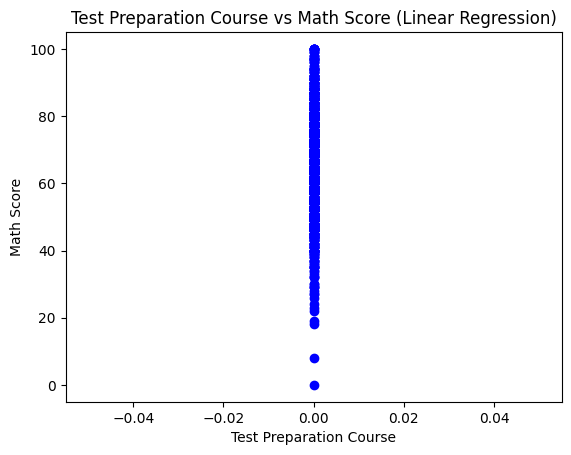

In [32]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title("Test Preparation Course vs Math Score (Linear Regression)")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.show()

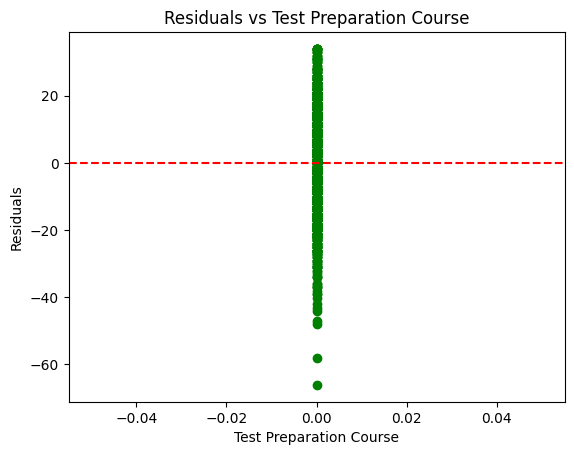

In [33]:
residuals = y - y_pred
plt.scatter(x, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')  # Line at 0 for residuals
plt.title("Residuals vs Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Residuals")
plt.show()

In [35]:
print(f"Maximum predicted Math Score: {y_pred.max()}")
print(f"Minimum predicted Math Score: {y_pred.min()}")

Maximum predicted Math Score: 66.089
Minimum predicted Math Score: 66.089
